# Домашнее задание «Визуализация данных»

<div class="alert alert-block alert-info">

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
<br>

Дополнительная часть
- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

</div>

<div class="alert alert-success">
    
<h2>Trending YouTube Video Statistics</h2>
<h3>Daily statistics for trending YouTube videos [RU region]</h3>  
https://www.kaggle.com/datasnaek/youtube-new
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json

In [2]:
from pylab import rcParams

<h3>1. Загрузка данных</h3>

Проблемы в кодировкой при загрузке csv решить не получилось. Попробовал по советам stackoverflow менять encoding, engine, открывать в sublime и пересохранять в UTF-8, в итоге одни проблемы решаются, но возникают в других местах )
Это всё из-за последнего столбца 'description' там видимо мешанина из эмоджи и чего-то еще. Решил загрузить без этого столбца и нескольких других 'video_error_or_removed', ratings_disabled', 'comments_disabled', 'video_id' - собственно они нам и так для EDA не понадобятся. Пересохранил файл для загрузки на github без них.

In [3]:
cols = ['trending_date', 'category_id', 'title', 'channel_title', 'publish_time', 
        'tags', 'views', 'likes', 'dislikes', 'comment_count']

In [4]:
df = pd.read_csv('RUvideos.csv', usecols=cols)

In [5]:
df.to_csv('RUvideos_cleared.csv', encoding='utf-8', index=False)

In [6]:
with open("RU_category_id.json", "r") as f:
    category_id = {int(item['id']): item['snippet']['title'] for item in json.load(f)['items']}

category_id

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Сразу добавим название категории в датафрейм:

In [7]:
def get_category(id):
    try:
        category = category_id[id]
    except:
        category = str(id)
    return category

In [8]:
df['category'] = df['category_id'].apply(get_category)

In [9]:
# столбец category_id больше не нужен
del df['category_id']

In [10]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,category
0,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,People & Blogs
1,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,People & Blogs
2,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,Entertainment
3,17.14.11,Сочная кесадилья с курицей,Hochland,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,People & Blogs
4,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,Entertainment


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40714 entries, 0 to 40713
Data columns (total 10 columns):
trending_date    40714 non-null object
title            40714 non-null object
channel_title    40714 non-null object
publish_time     40714 non-null object
tags             40714 non-null object
views            40714 non-null object
likes            40712 non-null object
dislikes         40712 non-null object
comment_count    40712 non-null object
category         40714 non-null object
dtypes: object(10)
memory usage: 3.1+ MB


<h3>2. Очистка, подготовка данных</h3>

In [12]:
n_df = df[df.isna().any(axis=1)]

In [13]:
n_df

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,category
25923,18.25.03,Когда уже закончится коррекция Биткоина? часть 2,Igor Jumatov,2018-03-24T21:47:02.000Z,"+100500|""Сообщество Онлайн Инвесторов iTuber""|...",что не боитесь потерять!\n\nМой Твиттер: http...,NaN,NaN,NaN,People & Blogs
27475,18.02.04,Кто дампит Биткоин? Хомяков опять побреют!,Igor Jumatov,2018-04-01T22:03:14.000Z,"+100500|""TSI Analytics""|""Сообщество Онлайн Инв...",что не боитесь потерять!\n\nМой Твиттер: http...,NaN,NaN,NaN,People & Blogs


In [14]:
# всего две строки с NaN-ми можно удалить
df = df.drop(index=[25923, 27475])

In [15]:
df.isnull().sum().sum()

0

Преобразуем форматы:

In [16]:
df['publish_time'] =  pd.to_datetime(df['publish_time'], infer_datetime_format=True)

In [17]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [18]:
df[df['views'].apply(pd.to_numeric, errors="coerce").isna()]

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,category
1766,2017-11-22,КАК ПОХУДЕТЬ! Гормоны. Бессонница.,Виталий Островский,2017-11-21 12:03:19,+как похудеть быстро +и эффективно +в домашних...,а также сборы трав и питания необходимо,согласовывая с Вашим лечащим врачом,\nкоторый наблюдает динамику Вашего здоровья!...,советы,People & Blogs
26325,2018-03-27,НОВЫЙ супер-способ ПИКИРОВКИ рассады!,А ты знал?,2018-03-26 12:30:41,"+как пикировать рассаду|""А ТЫ ЗНАЛ?""|""рассада ...",при этом,томаты в одну общую емкость,по бороздкам размечая сорта,а перцы по несколько семян в ячейки одной об...,People & Blogs
34312,2018-05-12,ЛУЧОК: садим НОВЫМ СПОСОБОМ!,А ты знал?,2018-05-11 08:48:27,"+когда сажать лук|""А ТЫ ЗНАЛ?""|""лук севка""|""лу...",то значит,наступило самое подходящее время высаживать ...,как всегда,ориентируемся по погоде и если весна ранняя...,People & Blogs


In [19]:
# удалим еще 3 некорректные строки:
df = df.drop(index=[1766, 26325, 34312])

In [20]:
# целочисленные признаки
df[['views', 'likes', 'dislikes', 'comment_count']] = df[['views', 'likes', 'dislikes', 'comment_count']].astype(int)

In [21]:
# теперь с типами данных ok
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40709 entries, 0 to 40713
Data columns (total 10 columns):
trending_date    40709 non-null datetime64[ns]
title            40709 non-null object
channel_title    40709 non-null object
publish_time     40709 non-null datetime64[ns]
tags             40709 non-null object
views            40709 non-null int32
likes            40709 non-null int32
dislikes         40709 non-null int32
comment_count    40709 non-null int32
category         40709 non-null object
dtypes: datetime64[ns](2), int32(4), object(4)
memory usage: 2.8+ MB


<h3>3. Исследовательский анализ данных</h3>

Посмотрим на временной диапазон выборки датасета:

In [22]:
print(df.trending_date.min())
print(df.trending_date.max())

2017-11-14 00:00:00
2018-06-14 00:00:00


In [23]:
# сохраним строку для подписи графиков
df_inf = 'по данным статистики трендов YouTube в RU-регионе за период ноябрь 2017 - июнь 2018'

Количество уникальных значений в каждой колонке:

In [24]:
df.nunique()

trending_date      205
title            34666
channel_title     6929
publish_time     34185
tags             26697
views            36860
likes            15339
dislikes          5614
comment_count     6354
category            17
dtype: int64

Всего 6929 разных каналов. Посмотрим на top-20 по частоте попадания в тренды:

In [25]:
top_20 = df['channel_title'].value_counts()[:20].sort_values(ascending=False)
top_20

Анатолий Шарий                                         197
Эхо Москвы                                             184
Модные Практики с Паукште Ириной Михайловной           169
Wylsacom                                               167
kamikadzedead                                          159
Россия 24                                              159
След - новый сезон                                     155
Калнина Наталья                                        155
PanArmenian TV                                         152
Трум Трум                                              144
Конец близок или свидетели финансового апокалипсиса    140
НТВ                                                    138
Xəzər Media                                            136
DaiFiveTop                                             135
Акыркы Кабарлар - Санжар Калматай                      132
Yoll                                                   131
telblog.net                                            1

Text(0.5, 0, 'Количество попаданий в тренды')

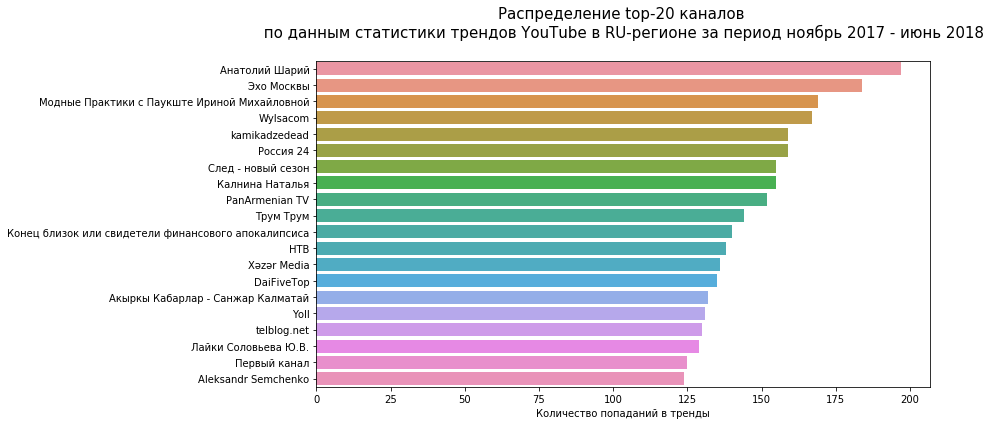

In [26]:
rcParams['figure.figsize'] = 11,6
plt.title(f"Распределение top-20 каналов \n {df_inf} \n",fontsize=15)
sns.barplot(x=top_20.values, y=top_20.index)
plt.xlabel('Количество попаданий в тренды')

Также посмотрим популярные категории:

In [27]:
top_categories = df['category'].value_counts().sort_values(ascending=False)

In [28]:
top_categories

People & Blogs          10337
Entertainment            5939
News & Politics          5400
Comedy                   3064
Film & Animation         3040
Howto & Style            2000
Sports                   1967
Music                    1894
Autos & Vehicles         1582
29                       1540
Science & Technology     1132
Gaming                   1042
Education                 714
Pets & Animals            602
Travel & Events           262
Shows                     193
Movies                      1
Name: category, dtype: int64

Text(0.5, 0, 'Количество попаданий в тренды')

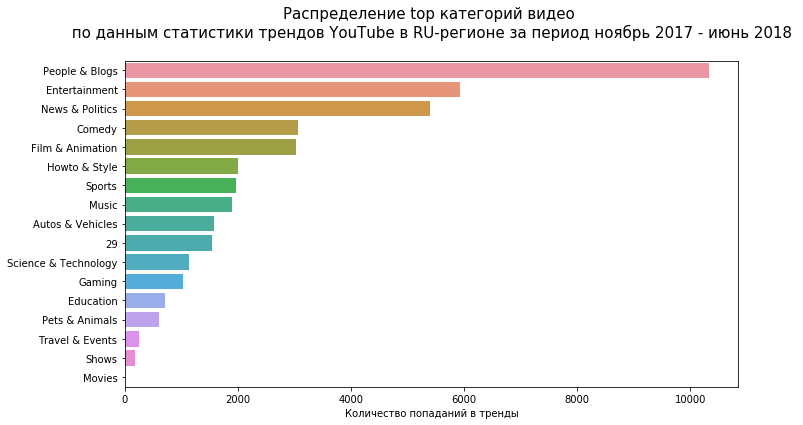

In [29]:
rcParams['figure.figsize'] = 11,6
plt.title(f"Распределение top категорий видео \n {df_inf} \n",fontsize=15)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.xlabel('Количество попаданий в тренды')

Категория 'People & Blogs' лидирует с большим отрывом. Людям интересно следить за другими людьми.<br>
Также в топе развлекательный контент и политический.

И один id под номером 29 почему-то не попал в json-файл с характеристиками категорий..<br><br>
Посмотрим на корреляцию количественных признаков:

In [30]:
correlation = df.corr()

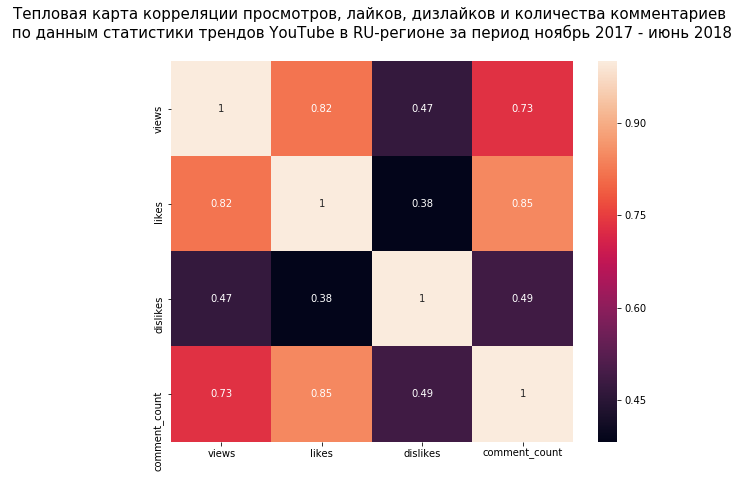

In [31]:
rcParams['figure.figsize'] = 9,7
plt.title(f"Тепловая карта корреляции просмотров, лайков, дизлайков и количества комментариев \n {df_inf} \n",fontsize=15)
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels=correlation.columns, annot=True)

Можно заметить, что количество лайков гораздо сильнее, чем количество дизлайков, скоррелированно с просмотрами и количеством комментариев.<br>
Возможно, что относительное количество дизлайков имеет больший разброс по категориям, а уровень лайков в разных категориях примерно одинаковый. 

Построим мадель линейной регрессии для пары признаков:

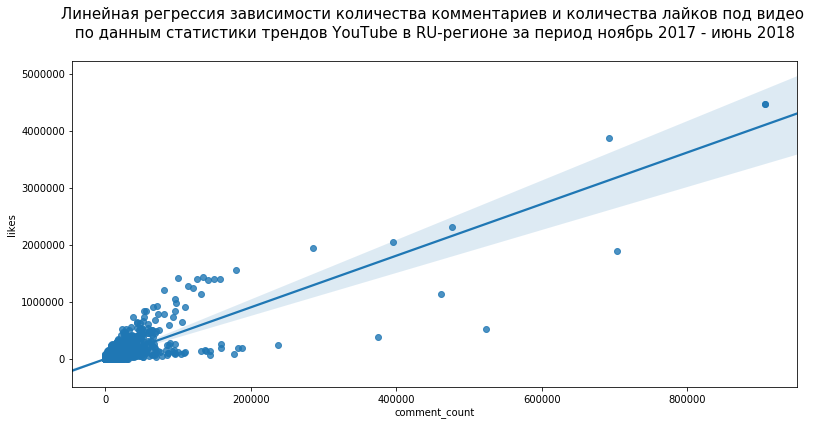

In [42]:
rcParams['figure.figsize'] = 13,6
plt.title(f"Линейная регрессия зависимости количества комментариев и количества лайков под видео \n {df_inf} \n",fontsize=15)
sns.regplot(x='comment_count', y='likes', data=df)

График вначале будто расщепляется на две половинки, возможно это группы разных категорий.  
И слишком длинные хвосты, попробуем их отсечь через межквартильный размах и посмотрим на одну категорию 'Travel & Events':

In [33]:
def get_upper_bound(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q3 + (1.5 * iqr)

In [34]:
likes_b = get_upper_bound(df.query("category == 'Travel & Events'").likes)
comments_b = get_upper_bound(df.query("category == 'Travel & Events'").comment_count)

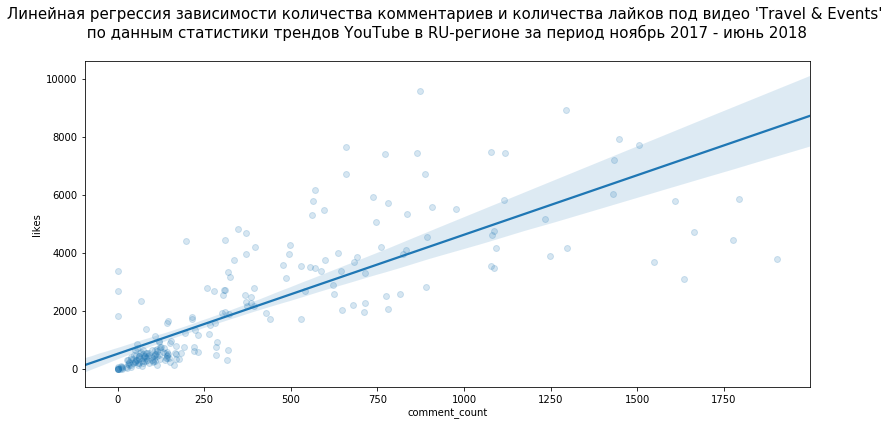

In [35]:
rcParams['figure.figsize'] = 13,6
plt.title(f"Линейная регрессия зависимости количества комментариев и количества лайков под видео 'Travel & Events' \n {df_inf} \n",fontsize=15)
sns.regplot(x='comment_count', y='likes', 
            data=df.query("likes < @likes_b & comment_count < @comments_b & category == 'Travel & Events'"), 
            scatter_kws={'alpha':0.18})

Так зависимость признаков уже более явно прослеживается.

Посмотрим на распределение просмотров внутри категорий на диаграмме размаха boxplot:

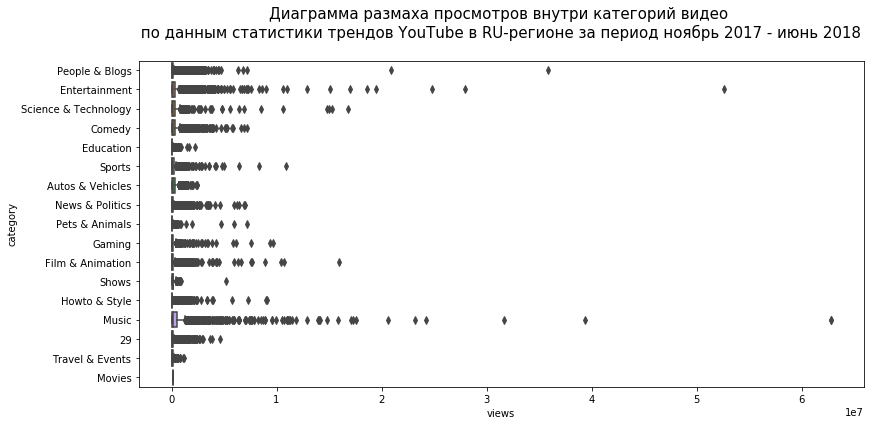

In [36]:
rcParams['figure.figsize'] = 13,6
plt.title(f"Диаграмма размаха просмотров внутри категорий видео \n {df_inf} \n",fontsize=15)
sns.boxplot(x='views', y='category', data=df, orient='h')

Очень много выбросов почти во всех категориях. Из-за роликов-чемпионов саму 'коробку' даже не видно.  
Посмотрим поближе самую частую категорию 'People & Blogs': 

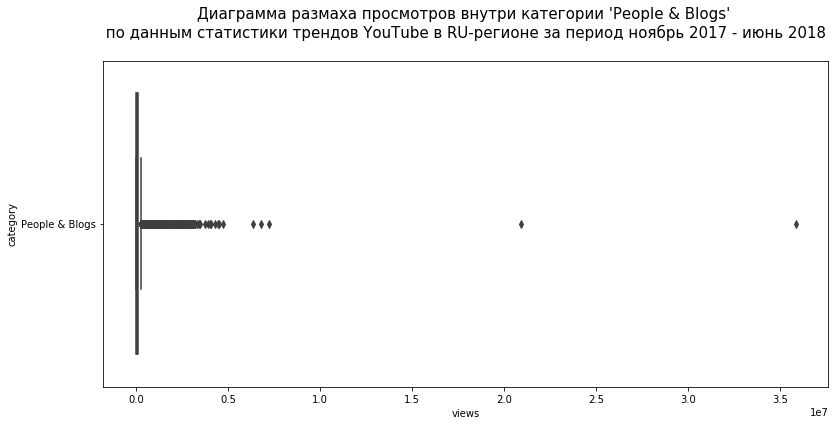

In [37]:
rcParams['figure.figsize'] = 13,6
plt.title(f"Диаграмма размаха просмотров внутри категории 'People & Blogs' \n {df_inf} \n",fontsize=15)
sns.boxplot(x='views', y='category', data=df.query("category == 'People & Blogs'"), orient='h')

In [38]:
df.query("category == 'People & Blogs'")['views'].describe()

count    1.033700e+04
mean     1.512672e+05
std      5.422378e+05
min      1.170000e+02
25%      1.391600e+04
50%      3.837000e+04
75%      1.161430e+05
max      3.583248e+07
Name: views, dtype: float64

Медианное значение всего 38.370.  
Видимо количество просмотров - это не определяющий признак для попадания в тренды.

<h3>Облака слов</h3>

In [39]:
STOPWORDS = {'от', 'с', 'в', 'из', 'как', 'для', 'не', 'что', 'за', 'и', 'все', 
             'я', 'о', 'об', 'на', 'это', 'про', 'или', 'по', 'у', 'его', 'none'}

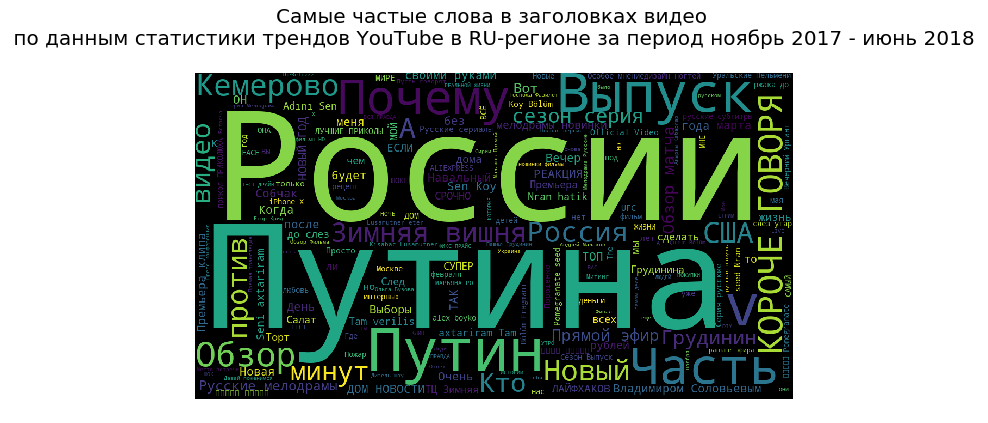

In [40]:
rcParams['figure.figsize'] = 13,6
Wcount1 = WordCloud(width=1100,height=600,stopwords=STOPWORDS).generate(' '.join(df.title))
plt.imshow(Wcount1)
plt.axis('off')
plt.title(f"Самые частые слова в заголовках видео \n {df_inf} \n",fontsize=20)
plt.show()

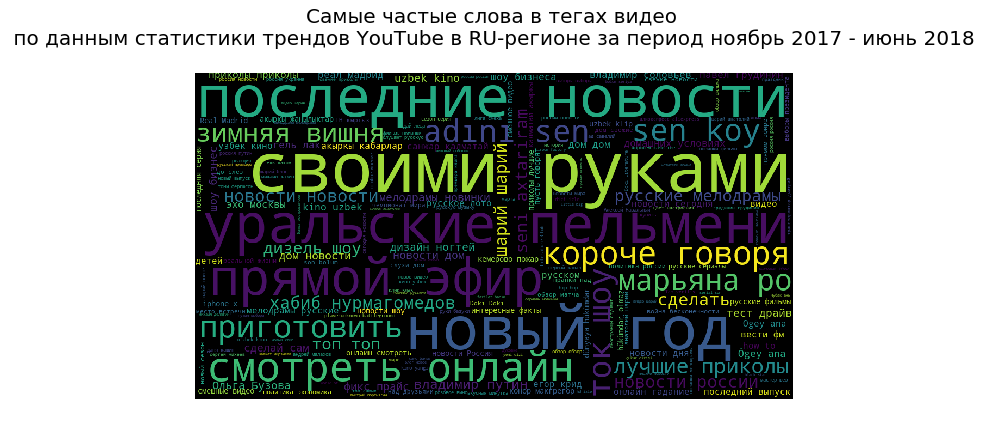

In [41]:
rcParams['figure.figsize'] = 13,6
Wcount2 = WordCloud(width=1100,height=600,stopwords=STOPWORDS).generate(' '.join(df.tags))
plt.imshow(Wcount2)
plt.axis('off')
plt.title(f"Самые частые слова в тегах видео \n {df_inf} \n",fontsize=20)
plt.show()